# Aula 04 - CNNs

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- Redes Neurais Convolucionais (CNN);
- Convoluções;
- _Pooling_;
- Exercícios.

##   

## Exercícios

__1)__ Desenvolva uma rede CNN para a base MNIST de classificação de dígitos, seguindo os passos abaixo:
- Carregue os dados segundo a função dada em aula, utilize os dados de teste como dados em __produção__, ou seja iremos usar em um outro momento;
- Nomeie os dados de treino como X e faça as seguintes separações: X em treino e teste (90/10%) e depois o X de treino em treino e validação (80/20%);
- Monte uma CNN;
- Faça as predições, avalie overfitting e salve o modelo final e os dados de produção;
- Carregue o modelo treinado e os dados de produção, e faça as novas predições.

In [1]:
# importe as bibliotecas padrões
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Função essencial para ler a base do MNIST
import os
import gzip

def carrega_mnist(caminho, tipo = 'train'):
    label_caminho = os.path.join(caminho, '%s-labels-idx1-ubyte.gz' % tipo)
    imagens_caminho = os.path.join(caminho, '%s-images-idx3-ubyte.gz' % tipo)
        
    with gzip.open(label_caminho, 'rb') as lbpath:
        lbpath.read(8)
        buffer = lbpath.read()
        labels = np.frombuffer(buffer, dtype=np.uint8)

    with gzip.open(imagens_caminho, 'rb') as imgpath:
        imgpath.read(16)
        buffer = imgpath.read()
        imagens = np.frombuffer(buffer, 
                               dtype=np.uint8).reshape(
            len(labels), 784).astype(np.float64)
 
    return imagens, labels

X, y = carrega_mnist('./datasets/')
X_producao, y_producao = carrega_mnist('./datasets/', "t10k")

In [3]:
# Shape dos dados originais
X.shape, y.shape

((60000, 784), (60000,))

In [4]:
# Reshape dos dados
IMG_SIZE = 28
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [5]:
# Shape novo
X.shape

(60000, 28, 28, 1)

In [6]:
# Normalização
X = X/255.

In [7]:
# Separa em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.1, 
                                                    random_state = 42,
                                                    stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54000, 28, 28, 1) (6000, 28, 28, 1) (54000,) (6000,)


In [8]:
# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

hot = OneHotEncoder()

y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.fit_transform(y_test.reshape(-1, 1)).toarray()

In [9]:
y_train[0:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [10]:
# Separa em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(43200, 28, 28, 1) (10800, 28, 28, 1) (6000, 28, 28, 1) (43200, 10) (10800, 10) (6000, 10)


In [11]:
# Cria as camadas

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

cnn = Sequential()

# 1 camada
cnn.add(Conv2D(16, (3, 3), activation = 'relu', input_shape = X_train.shape[1:]))
cnn.add(MaxPooling2D((2, 2)))
cnn.add(Flatten())

# 2 camada
cnn.add(Dense(32, activation = 'relu'))

# camada de output
cnn.add(Dense(y_train.shape[1], activation = 'softmax'))

In [12]:
# Compile da Rede
cnn.compile(loss = 'categorical_crossentropy', 
            optimizer = 'adam',
             metrics=['accuracy'])

# Salva os pesos iniciais
pesos_iniciais = cnn.get_weights()

# Sumario
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2704)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                86560     
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0

In [13]:
# Fit da rede e salva o historico
historico = cnn.fit(X_train, 
                    y_train, 
                    epochs = 20, 
                    verbose = 1,
                    validation_data = (X_val, y_val))

Epoch 1/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2425 - accuracy: 0.9294 - val_loss: 0.1142 - val_accuracy: 0.9676
Epoch 2/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0833 - accuracy: 0.9755 - val_loss: 0.0773 - val_accuracy: 0.9771
Epoch 3/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0593 - accuracy: 0.9818 - val_loss: 0.0727 - val_accuracy: 0.9789
Epoch 4/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0671 - val_accuracy: 0.9783
Epoch 5/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0372 - accuracy: 0.9887 - val_loss: 0.0764 - val_accuracy: 0.9772
Epoch 6/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0770 - val_accuracy: 0.9788
Epoch 7/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0702 - val_accuracy:

In [14]:
# método pra predizer as classes finais
y_pred = np.argmax(cnn.predict(X_test), axis = -1)
y_pred

array([1, 9, 3, ..., 5, 0, 4], dtype=int64)

In [15]:
# voltando o y_test pra valores nunéricos
y_test = np.argmax(y_test, axis = -1)
y_test

array([1, 9, 3, ..., 5, 0, 4], dtype=int64)

In [16]:
# Classification report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       592
           1       0.99      0.99      0.99       674
           2       0.97      0.98      0.97       596
           3       0.98      0.98      0.98       613
           4       0.98      0.98      0.98       584
           5       0.99      0.98      0.99       542
           6       0.99      0.98      0.99       592
           7       0.99      0.95      0.97       627
           8       0.97      0.98      0.97       585
           9       0.95      0.98      0.97       595

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



Matriz de confusão do modelo nos dados de teste:



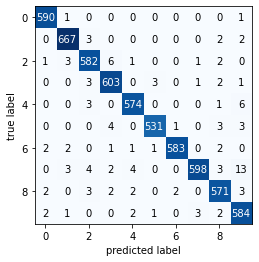

In [17]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)

print("Matriz de confusão do modelo nos dados de teste:\n")
plot_confusion_matrix(conf_mat=cm)
plt.show()

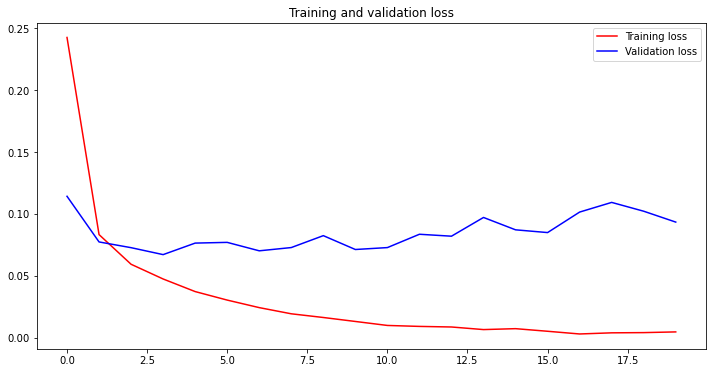

In [18]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = historico.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = historico.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

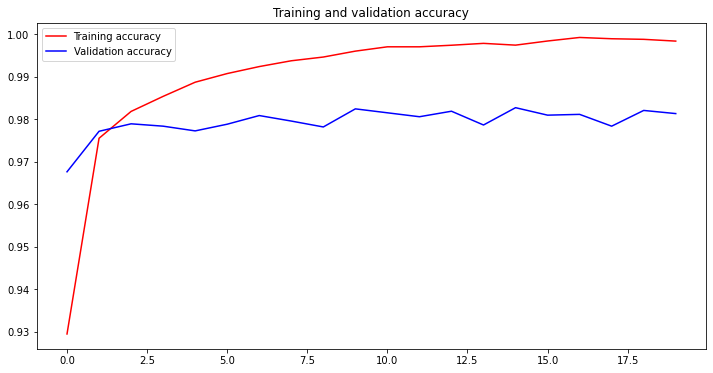

In [19]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = historico.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = historico.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [20]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', 
                           min_delta = 0.001,
                           patience = 10, 
                           verbose = 1, mode = 'auto')

# setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
cnn.set_weights(pesos_iniciais)

# treinando a rede neural novamente
# note o argumento "callbacks", ao qual passamos o objeto de early_stop
historico2 = cnn.fit(X_train, 
                     y_train, 
                     epochs = 20, 
                     verbose = 1,
                     validation_data = (X_val, y_val),
                     callbacks = [early_stop])

Epoch 1/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2127 - accuracy: 0.9365 - val_loss: 0.1048 - val_accuracy: 0.9706
Epoch 2/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0787 - accuracy: 0.9770 - val_loss: 0.0862 - val_accuracy: 0.9747
Epoch 3/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0734 - val_accuracy: 0.9784
Epoch 4/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0402 - accuracy: 0.9882 - val_loss: 0.0699 - val_accuracy: 0.9803
Epoch 5/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0307 - accuracy: 0.9907 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 6/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0239 - accuracy: 0.9928 - val_loss: 0.0615 - val_accuracy: 0.9820
Epoch 7/20
1350/1350 [==============================] - 5s 4ms/step - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0673 - val_accuracy:

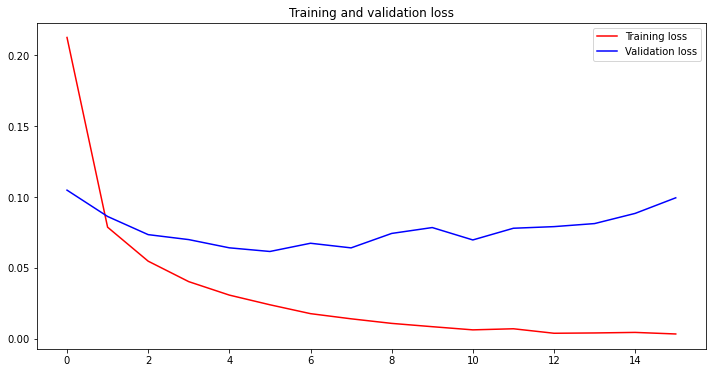

In [21]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
loss = historico2.history['loss']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_loss = historico2.history['val_loss']

# numero de epochs
epochs = range(len(loss))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss, 'red', label = 'Training loss')
plt.plot(epochs, val_loss, 'blue', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

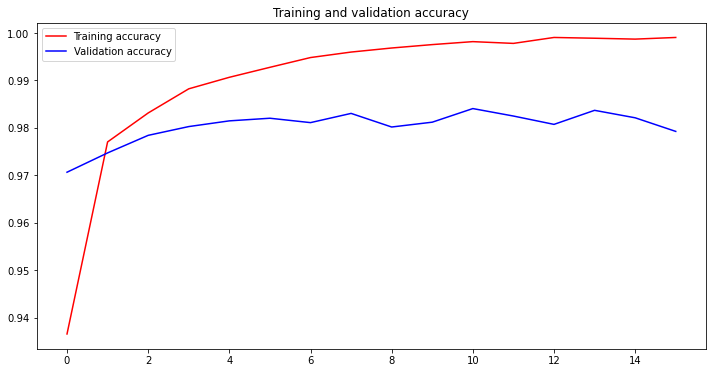

In [22]:
# valor da função de perda NOS DADOS DE TREINO a cada epoch
acc = historico2.history['accuracy']

# valor da função de perda NOS DADOS DE VALIDAÇÃO a cada epoch
val_acc = historico2.history['val_accuracy']

# numero de epochs
epochs = range(len(acc))

# plot
plt.figure(figsize=(12, 6))
plt.plot(epochs, acc, 'red', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'blue', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

Matriz de confusão do modelo nos dados de teste:



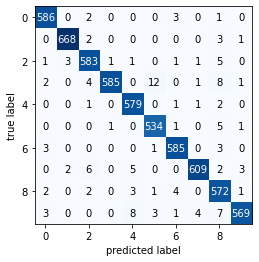

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       592
           1       0.99      0.99      0.99       674
           2       0.97      0.98      0.97       596
           3       1.00      0.95      0.97       613
           4       0.97      0.99      0.98       584
           5       0.97      0.99      0.98       542
           6       0.98      0.99      0.98       592
           7       0.99      0.97      0.98       627
           8       0.94      0.98      0.96       585
           9       0.99      0.96      0.97       595

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [23]:
y_pred = np.argmax(cnn.predict(X_test), axis = -1)

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

print(classification_report(y_test, y_pred))

## 

## Salvando Dados, Pesos e a Rede

Salvando os pesos da rede treinada e a arquitetura da rede:

In [24]:
from keras.models import model_from_json

In [25]:
cnn_json = cnn.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(cnn_json)
    
# serialize weights to HDF5
cnn.save_weights("weights.h5")

Dessa forma podemos carregar em qualquer outro lugar a mesma rede já treinada!
<br>
<br>
Agora vamos ver como podemos salvar os dados utilizando a biblioteca _Pickle_:

In [26]:
import pickle

dados_prod = open("X.pickle","wb")
pickle.dump(X_producao, dados_prod)
dados_prod.close()

## 

## Utilizando de Dados, Pesos e Rede já Salvos

Vamos primeiramente carregar a arquitetura da rede e os pesos:

In [27]:
json_file = open('cnn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_treinada = model_from_json(loaded_model_json)

# load weights into new model
cnn_treinada.load_weights("weights.h5")

Carregando os dados que queremos utilizar:

In [28]:
dados_novos = open("X.pickle","rb")
X_new = pickle.load(dados_novos)

In [29]:
X_new.shape

(10000, 784)

Agora como exercício se simular para dados que nunca foram vistos, vamos fazer o processamento desses dados novos antes de utilizar na rede:

In [30]:
X_new = np.array(X_new).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_new.shape

(10000, 28, 28, 1)

In [31]:
X_new = X_new/255.

In [32]:
# Recompilando a rede
cnn_treinada.compile(loss = 'categorical_crossentropy', 
                     optimizer = 'adam',
                     metrics=['accuracy'])

In [33]:
# Calculando os predicts para dados nunca vistos
y_pred_new = np.argmax(cnn_treinada.predict(X_new), axis = -1)
y_pred_new

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

## 